<a href="https://colab.research.google.com/github/yesyell/DA_School_1/blob/main/%EB%94%A5%EB%9F%AC%EB%8B%9D/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 합성곱 신경망 (비정형-이미지) Mnist 데이터

In [4]:
import matplotlib.pyplot as plt
from tensorflow import keras # 케라스에서 제공하는 손글씨 데이터를 불러옵니다.
from keras.models import Sequential
from keras.layers import Flatten, Dropout, Dense

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# 데이터 표준화
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [4]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2893 - accuracy: 0.9151
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1394 - accuracy: 0.9585
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1059 - accuracy: 0.9685
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0849 - accuracy: 0.9739
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0719 - accuracy: 0.9773


In [7]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 2s - loss: 0.0784 - accuracy: 0.9767 - 2s/epoch - 6ms/step


[0.07836759090423584, 0.9767000079154968]

## CNN을 사용하여 Keras로 MNIST 손글씨 인식 판단하기

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

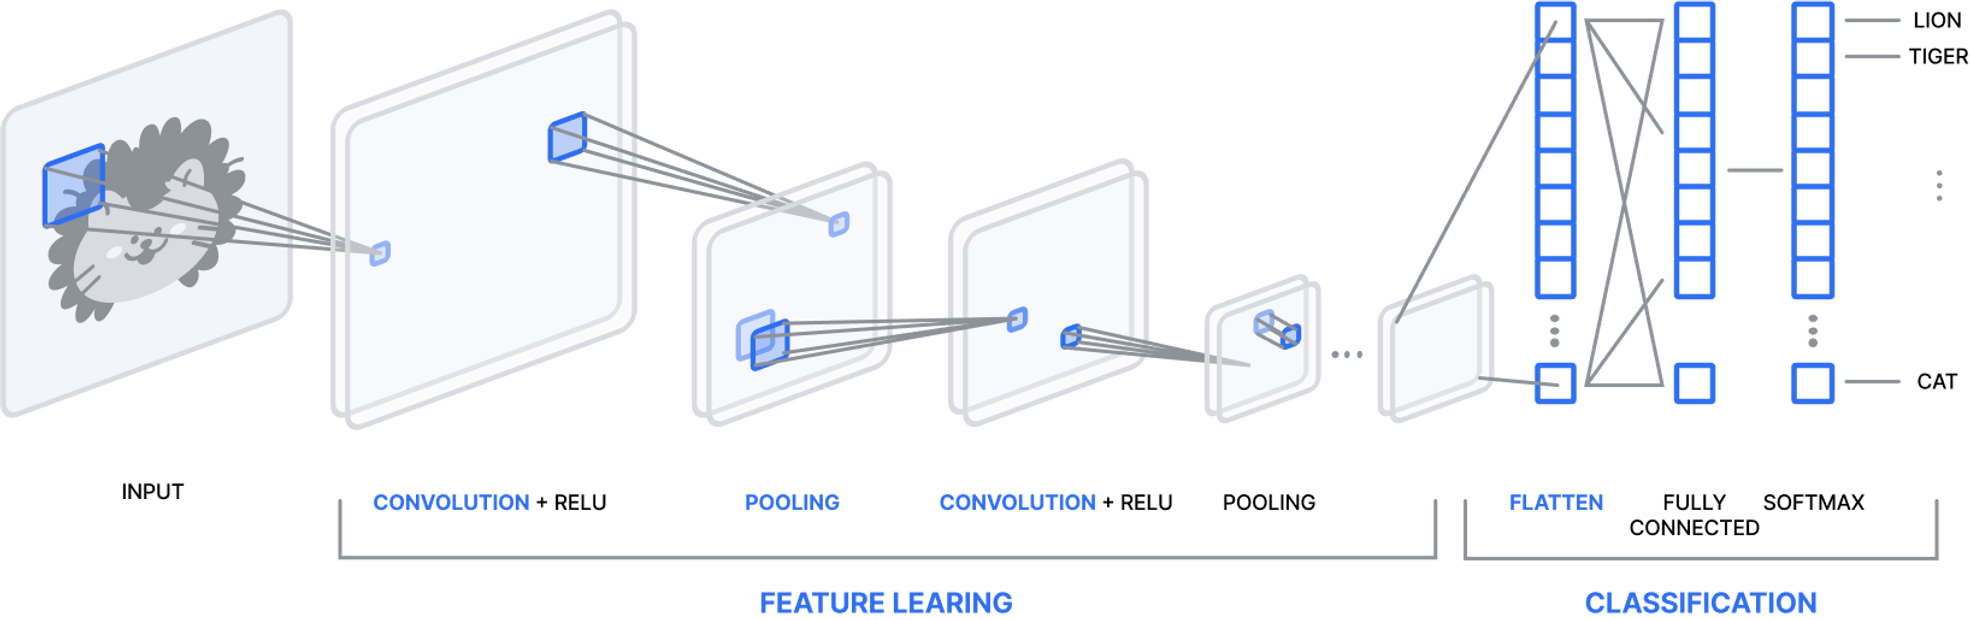

`Conv2D` : **컨벌루션**은 각 이미지에서 특정 특징을 활성화하는 컨벌루션 필터 집합에 입력 이미지를 통과시킵니다.

입력 이미지를 통과시킬때 활성함수를 적용합니다.

`activation='relu'` : **ReLU(Rectified Linear Unit)**는 음수 값을 0에 매핑하고 양수 값을 유지하여 더 빠르고 효과적인 학습을 가능하게 합니다. 이때 활성화된 특징만 다음 계층으로 전달되기 때문에 이 과정을 활성화라 부르기도 합니다.

`MaxPooling2D` : **풀링**은 비선형 다운샘플링을 수행하고 네트워크에서 학습해야 하는 매개 변수 수를 줄여서 출력을 간소화합니다.

In [9]:
# 입력층
inputs = keras.Input(shape=(28, 28, 1))

# 은닉층
x = Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = MaxPooling2D(pool_size=2)(x)
x = Conv2D(filters=128, kernel_size=3, activation="relu")(x)

# 출력층으로 넘기기 전에 1차원 텐서로 변환
x = Flatten()(x)

# 출력층
outputs = Dense(10, activation="softmax")(x)

# 모델
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856 

In [6]:
# image shape
img_rows = 28
img_cols = 28

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

input_shape = (img_rows, img_cols, 1)
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [8]:
batch_size = 128
num_classes = 10
epochs = 3

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [13]:
# 모델 정의
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_2 (Flatten)         (None, 3136)             

In [14]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# 모델 학습
hist = model.fit(x_train, y_train,
                 batch_size=batch_size, epochs=epochs, verbose=1,
                 validation_data=(x_test, y_test))

# 모델 평가
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/3
469/469 [==============================] - 136s 286ms/step - loss: 0.1797 - accuracy: 0.9453 - val_loss: 0.0452 - val_accuracy: 0.9855
Epoch 2/3
469/469 [==============================] - 128s 273ms/step - loss: 0.0599 - accuracy: 0.9812 - val_loss: 0.0337 - val_accuracy: 0.9888
Epoch 3/3
469/469 [==============================] - 154s 327ms/step - loss: 0.0436 - accuracy: 0.9865 - val_loss: 0.0290 - val_accuracy: 0.9905
Test loss: 0.028990235179662704
Test accuracy: 0.9904999732971191


313/313 [==============================] - 10s 28ms/step


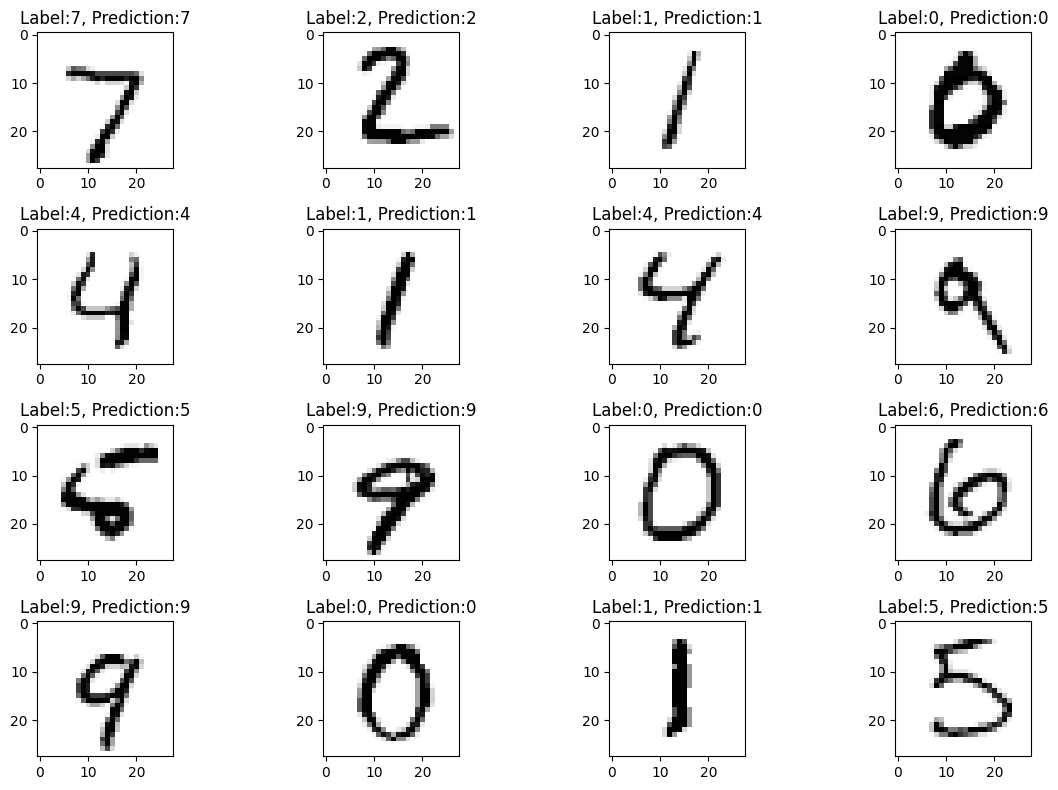

In [16]:
import numpy as np

predicted_result = model.predict(x_test)
predicted_labels = np.argmax(predicted_result, axis=1)

test_labels = np.argmax(y_test, axis=1)

count = 0

plt.figure(figsize=(12,8))
for n in range(16):
    count += 1
    plt.subplot(4, 4, count)
    plt.imshow(x_test[n].reshape(28, 28), cmap='Greys', interpolation='nearest')
    tmp = "Label:" + str(test_labels[n]) + ", Prediction:" + str(predicted_labels[n])
    plt.title(tmp)

plt.tight_layout()
plt.show()

In [1]:
# GPU
import tensorflow as tf
print(tf.test.gpu_device_name())

/device:GPU:0


In [1]:
# TPU
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU 검색
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.12.0
Running on TPU  ['10.112.127.10:8470']


In [9]:
with tpu_strategy.scope():
    # 모델 정의
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1), padding='same', activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(64, (2, 2), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(1000, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation='softmax'))
    model.summary()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 7, 7, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 3136)             

In [10]:
# 모델 학습
hist = model.fit(x_train, y_train,
                 batch_size=batch_size, epochs=epochs, verbose=1,
                 validation_data=(x_test, y_test))

# 모델 평가
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/3
469/469 [==============================] - 24s 35ms/step - loss: 0.1849 - accuracy: 0.9432 - val_loss: 0.0478 - val_accuracy: 0.9840
Epoch 2/3
469/469 [==============================] - 9s 20ms/step - loss: 0.0594 - accuracy: 0.9812 - val_loss: 0.0331 - val_accuracy: 0.9882
Epoch 3/3
469/469 [==============================] - 9s 19ms/step - loss: 0.0453 - accuracy: 0.9858 - val_loss: 0.0278 - val_accuracy: 0.9898
Test loss: 0.027817361056804657
Test accuracy: 0.989799976348877


# Passion Mnist - CNN

In [11]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


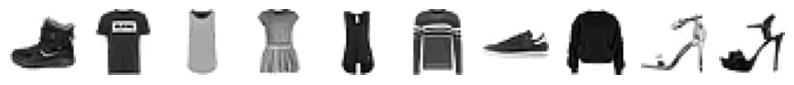

In [12]:
# 시각화
import matplotlib.pyplot as plt

# 처음 10개 이미지를 표시
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i], cmap='gray_r')
    axs[i].axis('off')
plt.show()

In [13]:
# 데이터 스케일링 및 차원 변환
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

# 훈련 데이터를 훈련 세트와 검증 세트로 분할
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

In [14]:
model = Sequential()

# 합성곱 레이어 및 풀링 레이어 추가
# kernel_size=3와 kernel_size=(3,3)은 동일한 의미입니다.
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D(2))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2))

# 완전 연결 레이어 추가
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3136)              0         
                                                                 
 dense_3 (Dense)             (None, 100)              

In [15]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

# 콜백 설정
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2)

# 모델 훈련
history = model.fit(train_scaled, train_target, epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.5276 - accuracy: 0.8107 - val_loss: 0.3314 - val_accuracy: 0.8817
Epoch 2/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3495 - accuracy: 0.8748 - val_loss: 0.2846 - val_accuracy: 0.8954
Epoch 3/20
1500/1500 [==============================] - 23s 15ms/step - loss: 0.3023 - accuracy: 0.8913 - val_loss: 0.2557 - val_accuracy: 0.9071
Epoch 4/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2701 - accuracy: 0.9037 - val_loss: 0.2427 - val_accuracy: 0.9112
Epoch 5/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2425 - accuracy: 0.9112 - val_loss: 0.2367 - val_accuracy: 0.9111
Epoch 6/20
1500/1500 [==============================] - 19s 13ms/step - loss: 0.2240 - accuracy: 0.9181 - val_loss: 0.2318 - val_accuracy: 0.9131
Epoch 7/20
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2075 - accuracy: 0.9242 - val_loss: 0.2262 -

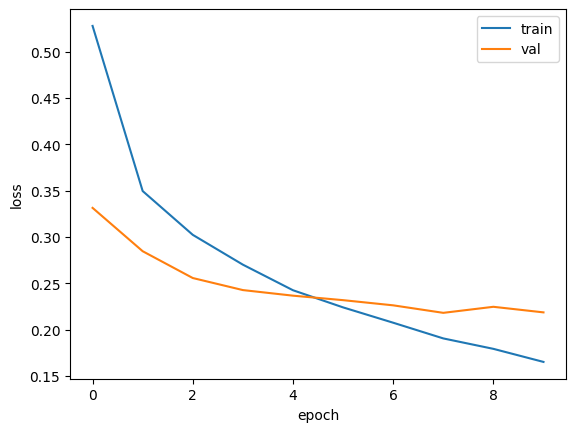

In [16]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [28]:
# 모델 평가
model.evaluate(val_scaled, val_target)

# 테스트 세트 평가
model.evaluate(test_scaled, test_target)

313/313 [==============================] - 3s 8ms/step - loss: 0.2462 - accuracy: 0.9171


[0.24622221291065216, 0.9171000123023987]

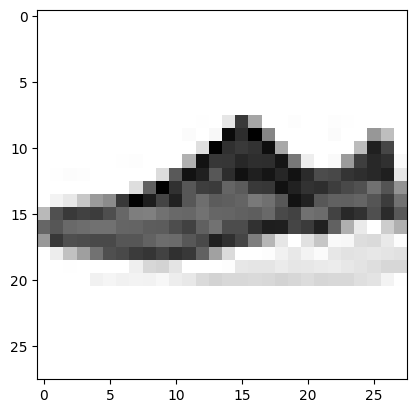

1/1 [==============================] - 0s 43ms/step


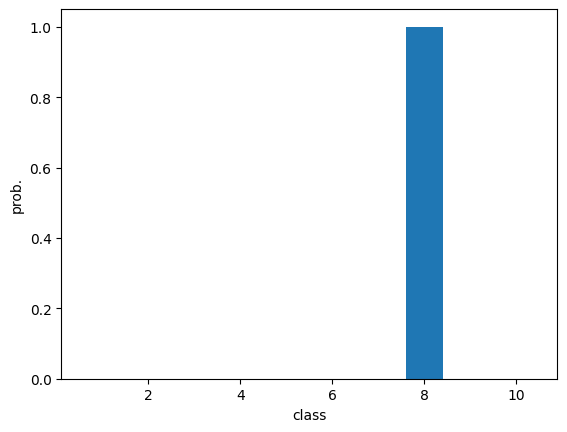

스니커즈


In [30]:
import numpy as np

plt.imshow(val_scaled[2].reshape(28, 28), cmap='gray_r')
plt.show()

# 예측
predicted = model.predict(val_scaled[2:3])
plt.bar(range(1, 11), predicted[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
print(classes[np.argmax(predicted)])

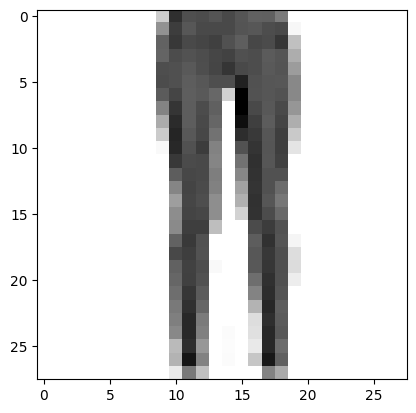

1/1 [==============================] - 0s 33ms/step


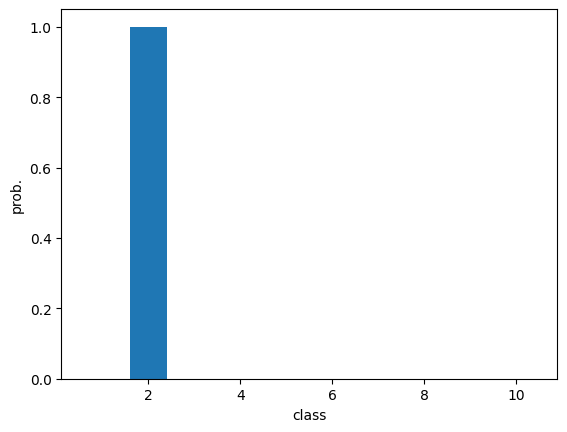

바지


In [32]:
plt.imshow(val_scaled[6].reshape(28, 28), cmap='gray_r')
plt.show()

# 예측
predicted = model.predict(val_scaled[6:7])
plt.bar(range(1, 11), predicted[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트',
           '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']
print(classes[np.argmax(predicted)])

# AutoKeras

AutoKeras는 자동화된 기계 학습 (AutoML)을 위한 Keras 기반 라이브러리입니다. 목표는 데이터 과학자들이 복잡한 모델 구조나 튜닝 없이 최적의 딥러닝 모델을 빠르게 개발할 수 있게 도와주는 것입니다. AutoKeras는 아래의 주요 기능들을 제공합니다:

1. **자동화된 아키텍처 탐색 (Neural Architecture Search, NAS)**: 최적의 네트워크 구조를 자동으로 탐색합니다.
2. **사전 처리 자동화**: 데이터의 스케일링, 범주형 변수 인코딩 등의 일반적인 사전 처리를 자동화합니다.
3. **모델 검증**: 교차 검증 등의 기법을 사용하여 모델의 성능을 자동으로 검증합니다.

In [ ]:
!pip install autokeras

In [3]:
import numpy as np
import tensorflow as tf
import autokeras as ak

Using TensorFlow backend


In [4]:
# 데이터 로딩
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 데이터 전처리: 스케일링
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 데이터 전처리: 차원 확장 (AutoKeras에 맞게 4D로 만듦)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

11490434/11490434 [==============================] - 2s 0us/step


In [5]:
# AutoKeras 모델 생성
clf = ak.ImageClassifier(overwrite=True, max_trials=1)

# 모델 훈련
history = clf.fit(x_train, y_train, epochs=10)

# 모델 평가
print(clf.evaluate(x_test, y_test))

Trial 1 Complete [00h 02m 59s]
val_loss: 0.04111112654209137

Best val_loss So Far: 0.04111112654209137
Total elapsed time: 00h 02m 59s
Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1558 - accuracy: 0.9527
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0747 - accuracy: 0.9777
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0600 - accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0503 - accuracy: 0.9841
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0453 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0416 - accuracy: 0.9870
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0381 - accuracy: 0.9877
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0366 - accuracy: 0.9888
Epoch 9/10
1875/1875 [==================

In [6]:
import matplotlib.pyplot as plt

# 모델의 구성 출력
model = clf.export_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 cast_to_float32 (CastToFlo  (None, 28, 28, 1)         0         
 at32)                                                           
                                                                 
 normalization (Normalizati  (None, 28, 28, 1)         3         
 on)                                                             
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0     

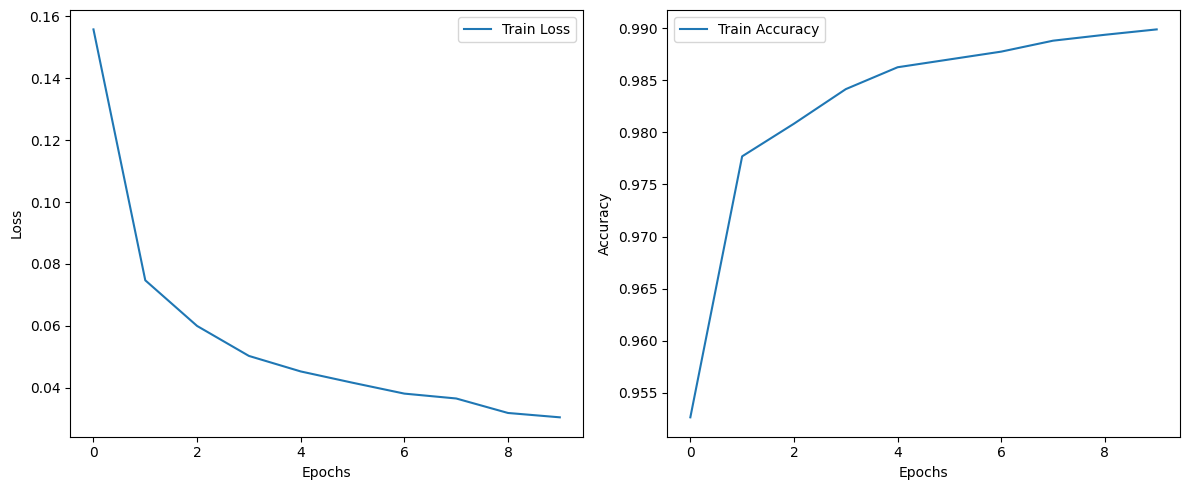

In [9]:
# 학습 과정 시각화
plt.figure(figsize=(12, 5))

# 손실 그래프
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 정확도 그래프
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# AutoML

AutoML(Automated Machine Learning)은 기계 학습 모델의 전체 과정을 자동화하여, 비전문가도 쉽게 모델을 개발하고 최적화할 수 있게 하는 기술입니다. AutoML의 주요 목표는 모델 선택, 피처 엔지니어링, 하이퍼파라미터 튜닝 등의 복잡한 과정을 자동화하여, 빠르고 효율적으로 최적의 모델을 찾는 것입니다.

In [ ]:
!pip install h2o

In [12]:
# H2O.ai's AutoML: 오픈 소스 ML 플랫폼 H2O에서 제공하는 AutoML 솔루션
import h2o
from h2o.automl import H2OAutoML

# H2O 초기화
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20" 2023-07-18; OpenJDK Runtime Environment (build 11.0.20+8-post-Ubuntu-1ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20+8-post-Ubuntu-1ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpffb71njw
  JVM stdout: /tmp/tmpffb71njw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpffb71njw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.3
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_xk30mc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [13]:
# 데이터 로드
data = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")

# 데이터 분할
train, test = data.split_frame([0.8])

# 응답 변수 및 입력 변수 설정
response = "response"
train[response] = train[response].asfactor()
test[response] = test[response].asfactor()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [14]:
# AutoML 설정 및 실행
aml = H2OAutoML(max_runtime_secs=120, seed=1)
aml.train(y=response, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),8/8
# GBM base models (used / total),4/4
# XGBoost base models (used / total),2/2
# DRF base models (used / total),1/1
# GLM base models (used / total),1/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None


In [17]:
# 성능 평가
lb = aml.leaderboard
print(lb.head())

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse       mse
StackedEnsemble_AllModels_1_AutoML_1_20230825_54124     0.786875   0.553263  0.802962                0.310923  0.433319  0.187765
StackedEnsemble_AllModels_2_AutoML_1_20230825_54124     0.786798   0.553329  0.802807                0.311884  0.433339  0.187783
StackedEnsemble_BestOfFamily_3_AutoML_1_20230825_54124  0.782635   0.558591  0.796882                0.313616  0.435427  0.189597
StackedEnsemble_BestOfFamily_2_AutoML_1_20230825_54124  0.781711   0.559159  0.796607                0.332202  0.435803  0.189924
StackedEnsemble_BestOfFamily_1_AutoML_1_20230825_54124  0.780558   0.559999  0.795691                0.338909  0.436362  0.190412
GBM_1_AutoML_1_20230825_54124                           0.778986   0.562589  0.794602                0.339269  0.437298  0.191229
GBM_2_AutoML_1_20230825_54124                           0.776592   0.563987  0.790694     

In [18]:
# 최고 성능 모델 예측
preds = aml.leader.predict(test)
preds

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,p0,p1
1,0.303713,0.696287
0,0.641897,0.358103
0,0.867091,0.132909
1,0.228989,0.771011
1,0.370118,0.629882
1,0.0723108,0.927689
0,0.86663,0.13337
1,0.406027,0.593973
1,0.604504,0.395496
0,0.671816,0.328184
